<a href="https://colab.research.google.com/github/faizijr12github/Car-Price-EDA/blob/main/Car_Price_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Price Analysis 🚗

In [5]:
!pip install kaggle

In [6]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d cooperunion/cardataset

Dataset URL: https://www.kaggle.com/datasets/cooperunion/cardataset
License(s): unknown


In [8]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/cardataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [9]:
import pandas as pd
df = pd.read_csv('/content/data.csv')
df.sample(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
6793,Mercedes-Benz,Metris,2016,premium unleaded (recommended),208.0,4.0,AUTOMATIC,rear wheel drive,3.0,Luxury,Large,Cargo Minivan,24,21,617,28950
11410,Suzuki,Vitara,2004,regular unleaded,165.0,6.0,MANUAL,four wheel drive,4.0,NaN,Compact,4dr SUV,20,17,481,18199
5119,Infiniti,G Sedan,2013,premium unleaded (required),328.0,6.0,MANUAL,rear wheel drive,4.0,"Luxury,High-Performance",Midsize,Sedan,25,17,190,37150
1105,Audi,A6,2015,diesel,240.0,6.0,AUTOMATIC,all wheel drive,4.0,"Diesel,Luxury",Midsize,Sedan,38,24,3105,62500
9293,GMC,Sierra 1500 Classic,2007,flex-fuel (unleaded/E85),295.0,8.0,AUTOMATIC,rear wheel drive,4.0,Flex Fuel,Large,Extended Cab Pickup,19,14,549,31115


In [10]:
df.shape

(11914, 16)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [12]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [13]:
df.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,69
Engine Cylinders,30
Transmission Type,0
Driven_Wheels,0
Number of Doors,6
Market Category,3742


In [14]:
df.duplicated().sum()

np.int64(715)

In [15]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

**Visualize missing data**

<Axes: >

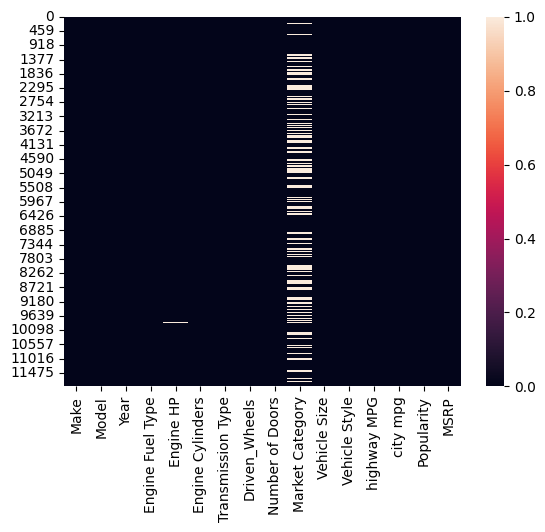

In [16]:
import seaborn as sns
sns.heatmap(df.isnull())

**List of categorical vs numerical columns**

In [17]:
import numpy as np
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()

print("Categorical Columns:", cat_cols)
print("Numerical Columns:", num_cols)

Categorical Columns: ['Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style']
Numerical Columns: ['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']


**Unique values in categorical columns**

In [18]:
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")

Make: 48 unique values
Model: 915 unique values
Engine Fuel Type: 10 unique values
Transmission Type: 5 unique values
Driven_Wheels: 4 unique values
Market Category: 71 unique values
Vehicle Size: 3 unique values
Vehicle Style: 16 unique values


**Target Distribution (MSRP)**

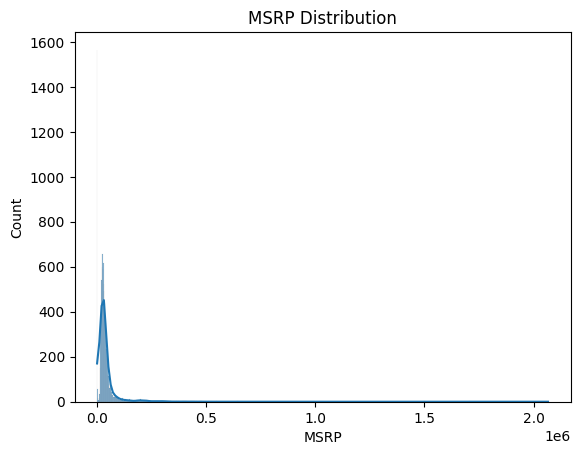

In [19]:
import matplotlib.pyplot as plt
sns.histplot(df['MSRP'], kde=True)
plt.title("MSRP Distribution")
plt.show()

**Observation**

The target variable **'MSRP'** is right-skewed — most cars are low-priced, with a few priced much higher.

**Correlation Heatmap (numerical only)**

In [20]:
df[num_cols].corr()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.351794,-0.041479,0.263787,0.258240,0.198171,0.073049,0.227590
Engine HP,0.351794,1.000000,0.779988,-0.102713,-0.406563,-0.439371,0.037501,0.662008
Engine Cylinders,-0.041479,0.779988,1.000000,-0.140088,-0.621606,-0.600776,0.041145,0.531312
Number of Doors,0.263787,-0.102713,-0.140088,1.000000,0.118570,0.120881,-0.048272,-0.126635
highway MPG,0.258240,-0.406563,-0.621606,0.118570,1.000000,0.886829,-0.020991,-0.160043
city mpg,0.198171,-0.439371,-0.600776,0.120881,0.886829,1.000000,-0.003217,-0.157676
Popularity,0.073049,0.037501,0.041145,-0.048272,-0.020991,-0.003217,1.000000,-0.048476
MSRP,0.227590,0.662008,0.531312,-0.126635,-0.160043,-0.157676,-0.048476,1.000000


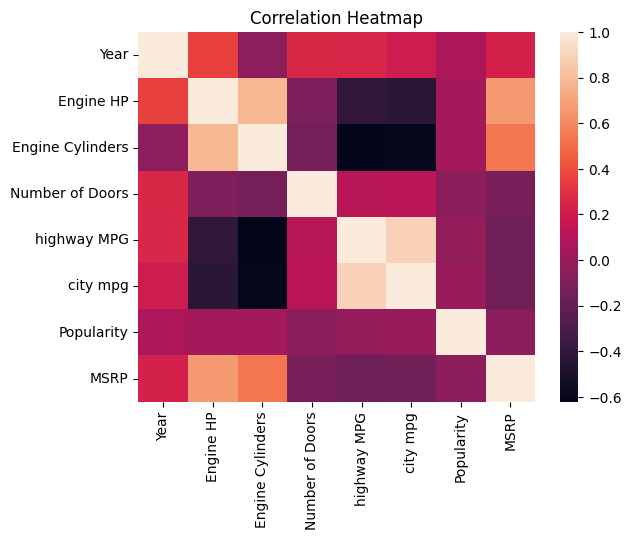

In [21]:
sns.heatmap(df[num_cols].corr())
plt.title("Correlation Heatmap")
plt.show()

**Insights**

*   Year vs MSRP: Newer cars tend to have a higher MSRP.
*   Engine HP vs MSRP: Higher horsepower usually means a higher price.
*   Engine Cylinders vs MSRP: More cylinders often lead to higher MSRP.
*   Highway MPG vs City MPG: Strong positive correlation — both rise together.



**📊 Univariate Analysis of Categorical Features using Plotly**

In [22]:
import plotly.express as px

for col in cat_cols:
    fig = px.histogram(df, x=col)
    fig.show()

**🔍 Categorical Feature Insights**

🚗 Make
▸ Most Common: Chevrolet (1123 entries)
▸ Least Common: Spyker, Genesis, and Bugatti (3 entries each)

📦 Model
▸ Most Common: Silverado 1500 (156 entries)
▸ Least Common: Many models appear only once

⛽ Engine Fuel Type
▸ Most Common: Regular Unleaded (7172 entries)
▸ Least Common: Natural Gas (2 entries)

🔁 Transmission Type
▸ Most Common: AUTOMATIC (8266 entries)
▸ Least Common: UNKNOWN (19 entries)

🚙 Driven Wheels
▸ Most Common: Front Wheel Drive (4787 entries)
▸ Least Common: Four Wheel Drive (1403 entries)

🏷️ Market Category
▸ Most Common: Crossover (1110 entries)
▸ Least Common: Many categories appear only once

📏 Vehicle Size
▸ Most Common: Compact (4764 entries)
▸ Least Common: Large (2777 entries)

🚘 Vehicle Style
▸ Most Common: Sedan (3048 entries)
▸ Least Common: Convertible SUV (29 entries)


**Top 5 car brands with higher hp**

In [23]:
top_hp_brands = df.groupby('Make')['Engine HP'].mean().sort_values(ascending=False).head(5)
top_hp_brands

,Engine HP
Make,
Bugatti,1001.000000
Lamborghini,614.076923
McLaren,610.400000
Maybach,590.500000
Bentley,533.851351


In [24]:
import plotly.express as px

top_hp_brands_df = top_hp_brands.reset_index() # .reset_index() converts Series into a proper DataFrame
fig = px.bar(top_hp_brands_df, x='Make', y='Engine HP', color='Make', title='Top 5 Car Brands with Highest Average HP')
fig.show()

**Top 5 car models with highest Hp**

In [25]:
top_hp_models = df.groupby('Model')['Engine HP'].mean().sort_values(ascending=False).head(5)
top_hp_models

,Engine HP
Model,
Veyron 16.4,1001.0
F12 Berlinetta,731.0
Aventador,715.0
Enzo,660.0
FF,651.0


In [26]:
top_hp_models_df = top_hp_models.reset_index()
fig = px.bar(top_hp_models_df, x='Model', y='Engine HP', color='Model', title='Top 5 Car Brands with Highest Average HP')
fig.show()

**Top 5 car fuel types with highest Hp**

In [27]:
top_fuel_types = df.groupby('Engine Fuel Type')['Engine HP'].mean().sort_values(ascending=False).head(5)
top_fuel_types

,Engine HP
Engine Fuel Type,
flex-fuel (premium unleaded required/E85),514.629630
premium unleaded (required),373.956695
flex-fuel (unleaded/E85),285.827586
flex-fuel (premium unleaded recommended/E85),283.346154
premium unleaded (recommended),270.497696


In [28]:
top_fuel_types_df = top_fuel_types.reset_index()
fig = px.bar(top_fuel_types_df, x='Engine Fuel Type', y='Engine HP', color='Engine Fuel Type', title='Top 5 Car Brands with Highest Average HP')
fig.show()

**Car transmissions according to Hp**

In [29]:
car_transmission_hp = df.groupby('Transmission Type')['Engine HP'].mean().sort_values(ascending=False)
car_transmission_hp

,Engine HP
Transmission Type,
AUTOMATED_MANUAL,320.683706
AUTOMATIC,258.643004
MANUAL,209.545826
UNKNOWN,167.105263
DIRECT_DRIVE,148.375000


In [30]:
car_transmission_hp_df = car_transmission_hp.reset_index()
fig = px.bar(car_transmission_hp_df, x='Transmission Type', y='Engine HP', color='Transmission Type', title='Car Transmissions According to Engine HP')
fig.show()

**Car drive according to Hp**

In [31]:
# Car drive according to Hp
car_drive_hp = df.groupby('Driven_Wheels')['Engine HP'].mean().sort_values(ascending=False)
car_drive_hp

,Engine HP
Driven_Wheels,
rear wheel drive,302.999405
all wheel drive,290.683355
four wheel drive,274.975766
front wheel drive,183.440110


In [32]:
car_drive_hp_df = car_drive_hp.reset_index()
fig = px.bar(car_drive_hp_df, x='Driven_Wheels', y='Engine HP', color='Driven_Wheels', title='Car Drive According to Engine HP')
fig.show()

**Car size according to Hp**

In [33]:
car_size_hp = df.groupby('Vehicle Size')['Engine HP'].mean().sort_values(ascending=False)
car_size_hp

,Engine HP
Vehicle Size,
Large,317.789014
Midsize,254.856881
Compact,204.645270


In [34]:
car_size_hp_df = car_size_hp.reset_index()
fig = px.bar(car_size_hp_df, x='Vehicle Size', y='Engine HP', color='Vehicle Size', title='Car Size According to Engine HP')
fig.show()

**Car style according to Hp**

In [35]:
car_style_hp = df.groupby('Vehicle Style')['Engine HP'].mean().sort_values(ascending=False)
car_style_hp

,Engine HP
Vehicle Style,
Coupe,328.972750
Convertible,313.129887
Crew Cab Pickup,301.258443
4dr SUV,262.882709
Passenger Van,255.117188
Extended Cab Pickup,242.179775
Sedan,239.962865
Cargo Van,213.715789
Regular Cab Pickup,213.237245


In [36]:
car_style_hp_df = car_style_hp.reset_index()
fig = px.bar(car_style_hp_df, x='Vehicle Style', y='Engine HP', color='Vehicle Style', title='Car Style According to Engine HP')
fig.show()

**Top 5 car brands with highest city mpg**

In [37]:
cars_city_mpg = df.groupby('Make')['city mpg'].mean().sort_values(ascending=False).head(5)
cars_city_mpg

,city mpg
Make,
Tesla,94.111111
FIAT,30.645161
Honda,25.443207
Scion,25.316667
Alfa Romeo,24.000000


In [38]:
cars_city_mpg_df = cars_city_mpg.reset_index()
fig = px.bar(cars_city_mpg_df, x='Make', y='city mpg', color='Make', title='Top 5 Car Brands with Highest City MPG')
fig.show()

**Top 5 car models with highest city mpg**

In [39]:
models_city_mpg = df.groupby('Model')['city mpg'].mean().sort_values(ascending=False).head(5)
models_city_mpg

,city mpg
Model,
i3,135.0
Fit EV,132.0
Bolt EV,128.0
Spark EV,128.0
e-Golf,126.0


In [40]:
models_city_mpg_df = models_city_mpg.reset_index()
fig = px.bar(models_city_mpg_df, x='Model', y='city mpg', color='Model', title='Top 5 Car Models with Highest City MPG')
fig.show()

**Top 5 car fuel types with highest city mpg**

In [41]:
fuel_city_mpg = df.groupby('Engine Fuel Type')['city mpg'].mean().sort_values(ascending=False).head(5)
fuel_city_mpg

,city mpg
Engine Fuel Type,
electric,112.696970
natural gas,27.000000
diesel,26.376623
premium unleaded (recommended),20.406435
regular unleaded,19.953988


In [42]:
fuel_city_mpg_df = fuel_city_mpg.reset_index()
fig = px.bar(fuel_city_mpg_df, x='Engine Fuel Type', y='city mpg', color='Engine Fuel Type', title='Top 5 Car Fuel Types with Highest City MPG')
fig.show()

**Car transmissions according to city mpg**

In [43]:
car_transmission_mpg = df.groupby('Transmission Type')['city mpg'].mean().sort_values(ascending=False)
car_transmission_mpg

,city mpg
Transmission Type,
DIRECT_DRIVE,110.794118
AUTOMATED_MANUAL,20.800319
MANUAL,19.666440
AUTOMATIC,18.939148
UNKNOWN,14.473684


In [44]:
car_transmission_mpg_df = car_transmission_mpg.reset_index()
fig = px.bar(car_transmission_mpg_df, x='Transmission Type', y='city mpg', color='Transmission Type', title='Car Transmissions According to City MPG')
fig.show()

**Car drive according to city mpg**

In [45]:
car_drive_mpg = df.groupby('Driven_Wheels')['city mpg'].mean().sort_values(ascending=False)
car_drive_mpg

,city mpg
Driven_Wheels,
front wheel drive,23.675371
all wheel drive,19.096048
rear wheel drive,16.521507
four wheel drive,15.068425


In [46]:
car_drive_mpg_df = car_drive_mpg.reset_index()
fig = px.bar(car_drive_mpg_df, x='Driven_Wheels', y='city mpg', color='Driven_Wheels', title='Car Drive According to City MPG')
fig.show()

**Car size according to highway mpg**

In [47]:
car_size_highway_mpg = df.groupby('Vehicle Size')['highway MPG'].mean().sort_values(ascending=False)
car_size_highway_mpg

,highway MPG
Vehicle Size,
Compact,28.942905
Midsize,26.803567
Large,22.420958


In [48]:
car_size_highway_mpg_df = car_size_highway_mpg.reset_index()
fig = px.bar(car_size_highway_mpg_df, x='Vehicle Size', y='highway MPG', color='Vehicle Size', title='Car Size According to Highway MPG')
fig.show()

**Car style according to highway mpg**

In [49]:
car_style_highway_mpg = df.groupby('Vehicle Style')['highway MPG'].mean().sort_values(ascending=False)
car_style_highway_mpg

,highway MPG
Vehicle Style,
4dr Hatchback,37.561254
2dr Hatchback,31.375494
Sedan,30.238517
Wagon,28.354730
Convertible,25.788146
Coupe,25.714286
4dr SUV,24.492765
Cargo Minivan,24.478873
Convertible SUV,23.724138


In [50]:
car_style_highway_mpg_df = car_style_highway_mpg.reset_index()
fig = px.bar(car_style_highway_mpg_df, x='Vehicle Style', y='highway MPG', color='Vehicle Style', title='Car Style According to Highway MPG')
fig.show()

**Top 5 popular car brands**

In [51]:
top_pop_cars = df.groupby('Make')['Popularity'].mean().sort_values(ascending=False).head(5)
top_pop_cars

,Popularity
Make,
Ford,5657.0
BMW,3916.0
Audi,3105.0
Ferrari,2774.0
Honda,2202.0


In [52]:
top_pop_cars_df = top_pop_cars.reset_index()
fig = px.bar(top_pop_cars_df, x='Make', y='Popularity', color='Make', title='Top 5 Popular Car Brands')
fig.show()

**Top 5 popular car models**

In [53]:
top_pop_models = df.groupby('Model')['Popularity'].mean().sort_values(ascending=False).head(5)
top_pop_models

,Popularity
Model,
Windstar Cargo,5657.0
Windstar,5657.0
Shelby GT500,5657.0
Taurus X,5657.0
Taurus,5657.0


In [54]:
top_pop_models_df = top_pop_models.reset_index()
fig = px.bar(top_pop_models_df, x='Model', y='Popularity', color='Model', title='Top 5 Popular Car Models')
fig.show()

**Top 5 popular car fuel types**

In [55]:
top_pop_fuel_types = df.groupby('Engine Fuel Type')['Popularity'].mean().sort_values(ascending=False).head(5)
top_pop_fuel_types

,Popularity
Engine Fuel Type,
flex-fuel (unleaded/E85),2303.780868
natural gas,2202.000000
electric,1773.454545
diesel,1622.428571
regular unleaded,1574.846068


In [56]:
top_pop_fuel_types_df = top_pop_fuel_types.reset_index()
fig = px.bar(top_pop_fuel_types_df, x='Engine Fuel Type', y='Popularity', color='Engine Fuel Type', title='Top 5 Popular Car Fuel Types')
fig.show()

**Popularity in car transmissions**

In [57]:
pop_car_transmissions = df.groupby('Transmission Type')['Popularity'].mean().sort_values(ascending=False)
pop_car_transmissions

,Popularity
Transmission Type,
DIRECT_DRIVE,1762.029412
AUTOMATED_MANUAL,1658.507987
MANUAL,1595.899830
AUTOMATIC,1531.997338
UNKNOWN,1037.473684


In [58]:
pop_car_transmissions_df = pop_car_transmissions.reset_index()
fig = px.bar(pop_car_transmissions_df, x='Transmission Type', y='Popularity', color='Transmission Type', title='Popularity in Car Transmissions')
fig.show()

**Popularity in car drives**

In [59]:
pop_car_drives = df.groupby('Driven_Wheels')['Popularity'].mean().sort_values(ascending=False)
pop_car_drives

,Popularity
Driven_Wheels,
four wheel drive,1742.979330
rear wheel drive,1729.661228
all wheel drive,1518.939652
front wheel drive,1394.413829


In [60]:
pop_car_drives_df = pop_car_drives.reset_index()
fig = px.bar(pop_car_drives_df, x='Driven_Wheels', y='Popularity', color='Driven_Wheels', title='Popularity in Car Drives')
fig.show()

**Popularity in car sizes**

In [61]:
pop_car_sizes = df.groupby('Vehicle Size')['Popularity'].mean().sort_values(ascending=False)
pop_car_sizes

,Popularity
Vehicle Size,
Large,1877.342456
Compact,1467.239505
Midsize,1445.667276


In [62]:
pop_car_sizes_df = pop_car_sizes.reset_index()
fig = px.bar(pop_car_sizes_df, x='Vehicle Size', y='Popularity', color='Vehicle Size', title='Popularity in Car Sizes')
fig.show()

**Popularity in car styles**

In [63]:
pop_car_styles = df.groupby('Vehicle Style')['Popularity'].mean().sort_values(ascending=False)
pop_car_styles

,Popularity
Vehicle Style,
Passenger Van,3756.109375
Cargo Minivan,3348.169014
Cargo Van,2736.431579
2dr SUV,2171.927536
Regular Cab Pickup,2124.890306
Extended Cab Pickup,2077.489567
Crew Cab Pickup,2002.149780
Passenger Minivan,1879.323741
Wagon,1619.175676


In [64]:
pop_car_styles_df = pop_car_styles.reset_index()
fig = px.bar(pop_car_styles_df, x='Vehicle Style', y='Popularity', color='Vehicle Style', title='Popularity in Car Styles')
fig.show()

**Top 5 expensive car brands**

In [65]:
top_exp_cars = df.groupby('Make')['MSRP'].mean().sort_values(ascending=False).head(5)
top_exp_cars

,MSRP
Make,
Bugatti,1.757224e+06
Maybach,5.462219e+05
Rolls-Royce,3.511306e+05
Lamborghini,3.315673e+05
Bentley,2.471693e+05


In [66]:
top_exp_cars_df = top_exp_cars.reset_index()
fig = px.bar(top_exp_cars_df, x='Make', y='MSRP', color='Make', title='Top 5 Expensive Car Brands')
fig.show()

**Top 5 expensive car models**

In [67]:
top_exp_models = df.groupby('Model')['MSRP'].mean().sort_values(ascending=False).head(5)
top_exp_models

,MSRP
Model,
Veyron 16.4,1.757224e+06
Reventon,1.500000e+06
Landaulet,1.381375e+06
Enzo,6.433300e+05
SLR McLaren,4.900000e+05


In [68]:
top_exp_models_df = top_exp_models.reset_index()
fig = px.bar(top_exp_models_df, x='Model', y='MSRP', color='Model', title='Top 5 Expensive Car Models')
fig.show()

**Car transmissions according to price**

In [69]:
car_transmission_price = df.groupby('Transmission Type')['MSRP'].mean().sort_values(ascending=False)
car_transmission_price

,MSRP
Transmission Type,
AUTOMATED_MANUAL,99508.370607
DIRECT_DRIVE,47351.250000
AUTOMATIC,41110.331720
MANUAL,26663.644293
UNKNOWN,3040.736842


In [70]:
car_transmission_price_df = car_transmission_price.reset_index()
fig = px.bar(car_transmission_price_df, x='Transmission Type', y='MSRP', color='Transmission Type', title='Car Transmissions According to Price')
fig.show()

**Car drive according to price**

In [71]:
car_drive_price = df.groupby('Driven_Wheels')['MSRP'].mean().sort_values(ascending=False)
car_drive_price

,MSRP
Driven_Wheels,
all wheel drive,58693.884828
rear wheel drive,55064.830317
four wheel drive,35312.039914
front wheel drive,23056.747650


In [72]:
car_drive_price_df = car_drive_price.reset_index()
fig = px.bar(car_drive_price_df, x='Driven_Wheels', y='MSRP', color='Driven_Wheels', title='Car Drive According to Price')
fig.show()

**Car size according to price**

In [73]:
car_size_price = df.groupby('Vehicle Size')['MSRP'].mean().sort_values(ascending=False)
car_size_price

,MSRP
Vehicle Size,
Large,53890.500540
Midsize,39035.919049
Compact,34275.336482


In [74]:
car_size_price_df = car_size_price.reset_index()
fig = px.bar(car_size_price_df, x='Vehicle Size', y='MSRP', color='Vehicle Size', title='Car Size According to Price')
fig.show()

**Car style according to price**

In [75]:
car_style_price = df.groupby('Vehicle Style')['MSRP'].mean().sort_values(ascending=False)
car_style_price

,MSRP
Vehicle Style,
Convertible,84224.284994
Coupe,76248.322048
4dr SUV,40421.871785
Sedan,39270.689633
Crew Cab Pickup,37220.466960
Passenger Van,29015.203125
Passenger Minivan,25621.050360
Wagon,25557.939189
Extended Cab Pickup,22488.776886


In [76]:
car_style_price_df = car_style_price.reset_index()
fig = px.bar(car_style_price_df, x='Vehicle Style', y='MSRP', color='Vehicle Style', title='Car Style According to Price')
fig.show()

**Relation between price and other numerical variables**

In [77]:
fig = px.scatter(df, x = 'Year', y = 'MSRP', color = 'Engine Cylinders')
fig.show()

**Key Insights**

*   Price Trends: Car prices (MSRP) have generally increased over the years.
*   Engine vs. Price: More cylinders usually mean a higher price, fewer cylinders mean lower.






In [78]:
fig = px.scatter(df, x = 'Engine HP', y = 'MSRP', color = 'Engine Cylinders')
fig.show()

**Simple Insights**


*   More horsepower → higher price.
*   More cylinders → more power.
*   Price jumps more with high power.
*   Most cars have low power and low price.
*   Some cars have high power but are still cheap.